# Phân cụm phân cấp (Hierarchical Clustering)

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab này bạn sẽ có thể:

- Sử dụng scikit-learning để phân cụm phân cấp
- Tạo các dendrogram để trực quan hóa phân cụm


<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#hierarchical_agglomerative">Phân cụm Phân cấp - Agglomerative</a></li>
            <ol>
                <li><a href="#generating_data">Khởi tạo Dữ liệu ngẫu nhiên</a></li>
                <li><a href="#agglomerative_clustering">Agglomerative Clustering (Phân cụm kết tụ)</a></li>
                <li><a href="#dendrogram">Biểu đồ Dendrogram liên quan đến Phân cụm kết tụ</a></li>
            </ol>            
        <li><a href="#clustering_vehicle_dataset">Phân cụm trên Tập dữ liệu Vehicle</a></li>
            <ol>
                <li><a href="#data_cleaning">Làm sạch dữ liệu</a></li>
                <li><a href="#clustering_using_scipy">Phân cụm sử dụng Scipy</a></li>
                <li><a href="#clustering_using_skl">Phân cụm sử dụng scikit-learn</a></li>
            </ol>
    </ol>
</div>
<br>
<hr>


<h1 id="hierarchical_agglomerative">Phân cụm Phân cấp - Agglomerative</h1>

Chúng ta sẽ xem xét một kỹ thuật phân cụm, đó là <b>Agglomerative Hierarchical Clustering (Phân cụm kết tụ)</b>. Hãy nhớ rằng agglomerative  là cách tiếp cận từ dưới lên. <br> <br>
Trong lab này, chúng ta sẽ xem xét phân cụm Agglomerative, phổ biến hơn phân cụm Divisive. <br> <br>
Chúng ta cũng sẽ sử dụng Complete Linkage làm Linkage Criteria (Tiêu chí Liên kết). <br>
<b> <i> LƯU Ý: Bạn cũng có thể thử sử dụng Average Linkage bất kỳ lúc nào có Complete Linkage để thấy sự khác biệt! </i> </b>


In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

<hr>
<h3 id="generating_data">Tạo dữ liệu ngẫu nhiên</h3>
Chúng ta sẽ tạo một tập hợp dữ liệu bằng cách sử dụng lớp <b> make_blobs </b>. <br> <br>
Nhập các tham số sau vào make_blobs:
<ul>
    <li> <b>n_samples</b>: Tổng số điểm được chia đều cho các cụm. </li>
    <ul> <li> Chọn một số từ 10-1500 </li> </ul>
    <li> <b>centers</b>: Số lượng tâm cần tạo hoặc vị trí tâm cố định. </li>
    <ul> <li> Chọn mảng tọa độ x, y để tạo các tâm. Có 1-10 trung tâm (ví dụ: centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: Độ lệch chuẩn của các cụm. Độ lệch càng lớn thì các cụm càng xa nhau </li>
    <ul> <li> Chọn một số từ 0.5-1.5 </li> </ul>
</ul> <br>
Lưu kết quả vào <b>X1</b> và <b>y1</b>.


In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Vẽ biểu đồ phân tán của dữ liệu được tạo ngẫu nhiên


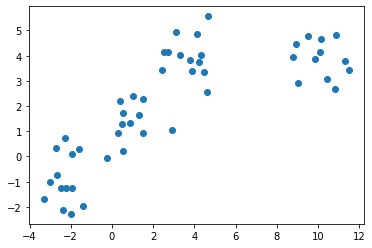

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

<hr>
<h3 id="agglomerative_clustering">Phân cụm kết tụ</h3>

Chúng ta sẽ bắt đầu bằng cách phân cụm các điểm dữ liệu ngẫu nhiên vừa tạo.


Lớp <b>Phân cụm Agglomerative </b> sẽ yêu cầu 2 input:

<ul>
    <li> <b>n_clusters</b>: Số lượng các cụm để hình thành cũng như số lượng tâm cần tạo ra. </li>
    <ul> <li> Giá trị sẽ là: 4 </li> </ul>
    <li> <b>linkage</b>: Sử dụng tiêu chí liên kết nào. Tiêu chí liên kết xác định khoảng cách sử dụng giữa các tập quan sát. Thuật toán sẽ hợp nhất các cặp cụm giảm thiểu tiêu chí này. </li>
    <ul> 
        <li> Giá trị sẽ là: 'complete' </li> 
        <li> <b>Lưu ý</b>: Bạn nên thử mọi thứ với mức 'average' (trung bình) </li>
    </ul>
</ul> <br>
Lưu kết quả vào biến <b> agglom </b>


In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Điều chỉnh mô hình với  <b> X2 </b> và <b> y2 </b> từ dữ liệu đã tạo ở trên.


In [5]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Chạy đoạn code sau để hiển thị phân cụm! <br>
Hãy nhớ đọc code và chú thích để hiểu thêm về cách tạo biểu đồ.


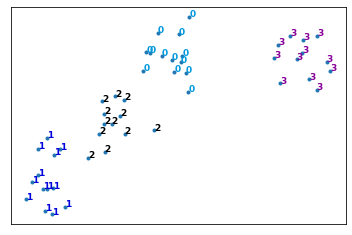

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

<h3 id="dendrogram">Dendrogram liên quan đến Phân cụm kết tụ</h3>

Hãy nhớ rằng một <b>ma trận khoảng cách</b> chứa <b>khoảng cách từ mỗi điểm đến mọi điểm khác của tập dữ liệu</b>.

Sử dụng hàm <b> distance_matrix, </b> yêu cầu <b> 2 input</b>. Sử dụng Feature Matrix (Ma trận đặc trưng), <b> X1 </b> đóng vai trò là input và lưu ma trận khoảng cách vào biến <b> dist_matrix </b> <br> <br>
Hãy nhớ rằng các giá trị khoảng cách là đối xứng, với đường chéo là 0. Đây là một cách để đảm bảo ma trận của bạn là chính xác. <br> (in ra dist_matrix để đảm bảo nó chính xác)

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.19184244 0.41665795 ... 0.17140831 0.67577423 0.09752962]
 [0.19184244 0.         0.58064673 ... 0.32422248 0.5956753  0.21337444]
 [0.41665795 0.58064673 0.         ... 0.25648155 1.07658202 0.48372818]
 ...
 [0.17140831 0.32422248 0.25648155 ... 0.         0.84685338 0.25738831]
 [0.67577423 0.5956753  1.07658202 ... 0.84685338 0.         0.59442168]
 [0.09752962 0.21337444 0.48372818 ... 0.25738831 0.59442168 0.        ]]


Sử dụng lớp <b> linkage</b> từ hệ thống phân cấp, truyền vào các tham số:

<ul>
    <li> Ma trận khoảng cách</li>
    <li> 'complete' cho complete linkage </li>
</ul> <br>
Lưu kết quả vào biến <b> Z </b>


In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/jl/87v8p9cx1ddb40vd90ddy2lw0000gn/T/ipykernel_32256/3518085107.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Phân cụm phân cấp thường được biểu thị dưới dạng biểu đồ dendrogram như được hiển thị trong cell sau. Mỗi hợp nhất được thể hiện bằng một đường ngang. Tọa độ y của đường ngang là điểm tương tự của hai cụm đã được hợp nhất, trong đó các thành phố được xem như là các cụm đơn.
Bằng cách di chuyển lên từ lớp dưới cùng lên nút trên cùng, biểu đồ dendrogram cho phép chúng ta xây dựng lại lịch sử của các hợp nhất dẫn đến phân cụm được mô tả.

Tiếp theo, chúng ta sẽ lưu dendrogram vào biến <b>dendro</b>. Khi làm điều này, biểu đồ dendrogram cũng sẽ được hiển thị.
Sử dụng lớp <b> dendrogram </b> từ hệ thống phân cấp, truyền vào tham số:

<ul> <li> Z </li> </ul>


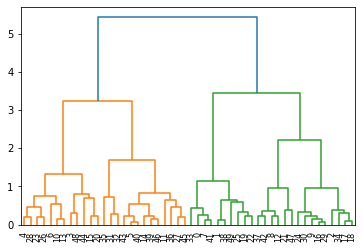

In [9]:
dendro = hierarchy.dendrogram(Z)

## Thực hành

Chúng ta đã sử dụng **complete** linkage, hãy thay đổi nó thành **average** linkage để xem biểu đồ thay đổi như thế nào.


/var/folders/jl/87v8p9cx1ddb40vd90ddy2lw0000gn/T/ipykernel_32256/2831339836.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix,'average')


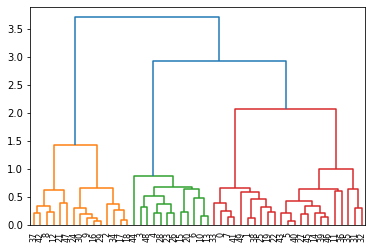

In [11]:
# Nhập code của bạn ở đây
Z = hierarchy.linkage(dist_matrix,'average')
dendro = hierarchy.dendrogram(Z)

<details><summary>Click vào dây để xem lời giải</summary>

```python
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

```

</details>


<hr>
<h1 id="clustering_vehicle_dataset">Phân cụm trên tập dữ liệu Vehicle </h1>

Hãy tưởng tượng rằng một nhà sản xuất ô tô đã phát triển các nguyên mẫu cho một loại xe mới. Trước khi giới thiệu mẫu xe mới vào phân khúc, nhà sản xuất muốn xác định các loại xe hiện có trên thị trường giống với nguyên mẫu nhất - nghĩa là, có thể phân nhóm xe như thế nào, nhóm nào giống nhất với mẫu xe và để biết mẫu xe nào họ sẽ cạnh tranh cùng.

Mục tiêu của chúng ta ở đây là sử dụng phương pháp phân cụm để tìm ra các cụm phương tiện đặc trưng nhất. Nó sẽ tóm tắt các loại xe hiện có và giúp các nhà sản xuất đưa ra quyết định về việc cung cấp các mẫu xe mới.


## Đọc dữ liệu

Hãy đọc tập dữ liệu để xem nhà sản xuất đã thu thập những đặc trưng nào về các mẫu hiện có.


In [ ]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Tập đặc trưng gồm giá theo đơn vị nghìn (price), kích thước động cơ (engine_s), mã lực (horsepow), chiều dài cơ sở (wheelbas), chiều rộng (width), chiều dài (length), kích thước giới hạn (curb_wgt), dung tích nhiên liệu (fuel_cap) và mức tiêu hao nhiên liệu (mpg).


<h2 id="data_cleaning">Làm sạch dữ liệu</h2>

Hãy xóa tập dữ liệu bằng cách loại bỏ các hàng có giá trị null:


In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

### Lựa chọn đặc trưng

Hãy chọn tập đặc trưng:


In [ ]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Chuẩn hóa (Normalization)

Bây giờ chúng ta có thể chuẩn hóa tập đặc trưng. **MinMaxScaler** chuyển đổi các đặc trưng bằng cách chia tỷ lệ từng đặc trưng cho một phạm vi nhất định. Theo mặc định là (0, 1), tức là bộ ước lượng này chia tỷ lệ và dịch chuyển các giá trị của từng đặc trưng riêng lẻ sao cho nó nằm giữa 0 và 1.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

<h2 id="clustering_using_scipy">Phân cụm sử dụng Scipy</h2>

Trong phần này, chúng ta sử dụng gói Scipy để phân cụm tập dữ liệu.

Trước tiên, hãy tính toán ma trận khoảng cách.


In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

Trong phân cụm kết tụ, tại mỗi lần lặp, thuật toán phải cập nhật ma trận khoảng cách để phản ánh khoảng cách của cụm mới hình thành với các cụm còn lại trong forest.
Các phương thức sau được hỗ trợ trong Scipy để tính toán khoảng cách giữa cụm mới được hình thành và từng cụm:

```
- single 
- complete 
- average 
- weighted 
- centroid 
```


Trường hợp của chúng ta sử dụng **complete**, nhưng hãy đổi để xem kết quả thay đổi ra sao.



In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

Về cơ bản, phân cụm phân cấp không yêu cầu số lượng cụm được chỉ định trước. Tuy nhiên, trong một số trường hợp, chúng ta muốn có một phân cụm gồm các cụm rời rạc giống như trong phân cụm phẳng.
Vậy, bạn có thể sử dụng một đường cắt:


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Ngoài ra, bạn có thể xác định trực tiếp số lượng cụm:


In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


Bây giờ, hãy vẽ biểu đồ dendrogram:


In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<h2 id="clustering_using_skl">Phân cụm sử dụng scikit-learn</h2>

Hãy làm lại lần nữa, nhưng lần này sử dụng gói scikit-learn:


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

In [ ]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Bây giờ, chúng ta có thể sử dụng hàm 'AgglomerativeClustering' từ thư viện scikit-learning để phân cụm tập dữ liệu. AgglomerativeClustering thực hiện phân cụm phân cấp bằng cách sử dụng phương pháp từ dưới lên. Tiêu chí liên kết xác định số liệu được sử dụng cho chiến lược hợp nhất:

- Ward giảm thiểu tổng bình phương của sự khác biệt trong tất cả các cụm. Đây là một cách tiếp cận giảm thiểu phương sai và nó tương tự như hàm mục tiêu k-mean nhưng được giải quyết bằng cách tiếp cận phân cấp tổng hợp.
- Maximum hay complete linkage giảm thiểu khoảng cách tối đa giữa các quan sát của các cặp cụm.
-  Average linkage giảm thiểu trung bình của khoảng cách giữa tất cả các quan sát của các cặp cụm.

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

Chúng ta có thể thêm một trường mới vào khung dữ liệu để hiển thị cụm của mỗi hàng:


In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Như bạn có thể thấy, chúng ta đang thấy sự phân bố của từng cụm bằng biểu đồ phân tán, nhưng không rõ đâu là tâm của mỗi cụm. Hơn nữa, có 2 loại phương tiện trong tập dữ liệu: "truck" (giá trị 1 trong cột type) và "car" (giá trị 1 trong cột type). Vì vậy, chúng ta sử dụng chúng để phân biệt các lớp và tóm tắt cụm. Đầu tiên, hãy đếm số trường hợp trong mỗi nhóm:


In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

Bây giờ chúng ta có thể xem xét các đặc điểm của từng cụm:


In [ ]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

Rõ ràng là chúng ta có 3 cụm chính với phần lớn các phương tiện trong đó.

**Car (Ô tô)**:

- Cụm 1: với mức tiêu hao nhiên liệu khá cao và mã lực thấp.
- Cụm 2: có mức tiêu hao nhiên liệu và mã lực tốt, nhưng giá cao hơn mức trung bình.
- Cụm 3: có mức tiêu hao nhiên liệu thấp, mã lực cao, giá cao nhất.

**Truck (Xe tải)**:

- Cụm 1: có mức tiêu hao nhiên liệu gần như cao nhất trong các loại xe tải, thấp nhất về mã lực và giá cả.
- Cụm 2: có mức tiêu hao nhiên liệu gần như thấp và mã lực trung bình, nhưng giá cao hơn mức trung bình.
- Cụm 3: có mức tiêu hao nhiên liệu và mã lực tốt, giá rẻ.

Xin lưu ý rằng chúng ta không sử dụng  **type** và **price** của ô tô trong quá trình phân cụm, nhưng phân cụm phân cấp có thể tạo ra các cụm và phân biệt chúng với độ chính xác khá cao.


In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**